## Smart detection with blocks knowledge 

In [3]:
%matplotlib inline
import csv
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import collections
import numpy as np

In [2]:
# Load a snapshot of a network 
G = nx.read_gpickle('trustchain.pickle')

# Eventually consistent Ledger for P2P 


We don't want to use global consensus algorithms (i.e. BFT based on voting, or exchanging a lot of redundant information). Such consensus algorithms are not scalable either in a number of peers or throughput.
An implicit consensus with related peers might work. 


I have studied applications where Trustchain can shine and very few require strong consistency on the events. 
Identity, bandwidth exchange and ledger and ATMs in banks don't have strong consistency. They allow marginal quantifiable error in exchange for availability and scalability.

There is practically no need to use a totally ordered set(Chain) even for one account. We need to look into the partially/casually ordered set. There is no dependency between getting bandwidth from two peers, such events can easily happen in parallel. Using a totally ordered requires and even forces peer to sync on a counter, it is like using a lock, it is easy and does it is the thing, but it is a huge overkill for most of the applications.  

What we want is to quantify the risk double-spending, or to put more generally we want to minimize the ability to hide some information from the other peer. Having near full information is crucial to the decision making the process of the peer. So don't need the full ordering of the event but knowledge completeness.  


To guarantee eventual consistency with quantifiable risk: 
 1. Each peer must share to the network the event 
 
  - If the event is not shared in the network it is impossible to protect/mitigate hiding
  - To save bandwidth the event must be shared in the network with the peers that are interested/subscribed for this information
  - Peer must known at least `f+1` peer that are related to an account `A` - *witnesses*. Peer that had/or have common history with `A`.   
  
 2. Each transaction must be build on top of the lastest state(lastest set of known events)
 
  - This guarantees that block cannot be hidden and all related peers will eventaully converge to the same common state
  - The state is presented with a partially ordered set *PoSet* - this is enough to gurantee convergance, but they are usually much more parallel-friendly. DS to test out: **DAG-CHAIN, Vector(Bloom)Clock, Merkle tree variants**. Each of these data structures are used to compactly accumulate sets of parially ordered sets. 
  
 3. The consistency of the system is formed as following: 
 
   - We need to maintain a system invariant, for example account balance must be positive and etc.
   - Some invariants are easy to maintain in eventual world: For example growing only counter and a low bound
   - We can guarantee invariants by pre-conditions of each transaction
   - Some applications require strict consitency - no invariant violation, but some are less strict on that, we aim for these applications.
   - There several ways to achieve just-enough consistency for invariants: 
       1. Smaller transactions when approaching the invariant bound 
       2. Give the consistency completly, but don't serve/... when invariant is broken


We need a data structure that will combine deltas into one compressed represention. 

Naive option: 
 - Store deltas of transactions in a set 
 




In [ ]:
# Tribler token ledger 
# Creating a Token Economy for Anonymous bandwidth sharing 
# Anonymous network -> well-defined operations 

# Accounting mechanisms 
# Making the accounting mechanisms useful 


In [ ]:

   A: Bloom filter A increase with operation in B $H_k(B)+=1$
   
   B: Confirm that B received and update it's state $H_k(A)+=1$
   
   


General Transaction format: `from, to, payload(count), hash, signature`


## 0. Store in a Account - Chain with a counter

Store as it stored now - all events realted to account are connected in a totally ordered chain. 

When peer recieves a new transaction with an inclusion proof it can download necessary transaction from local head to current head in the transaction. 

**Inclusion proof:**

1. Each transaction has a chained has based on a continously chaining hash root of a Account Chain 

**Validation:**

- To validate peer will rebuild it's own local chain by donwloading realted transactions.
- Peer constructs chain  from the last head to the current head, if it find some inconsistency it will suspect peer B that it changed the chain / or it was restructured? Possible strategies:
 + Ask other peer about the chain - local quorum consensus 
 + Keep transactions from peer B 
- When peer A sees a counter it must download other transactions from other peer it is able to download from peer B or if it sees that transaction is a confirmation transaction from peer C, it may request state from peer C.
- Some transaction might not be confirmed but they are part of the chain so peer A cannot hide it. 

**Double spending scenario:** 
 
1. Peer A is double spending and peer B and peer C is estimating double spend probability etc.  
- Peer A creates a source block b and another block b' with the same previous hash for both blocks
- This can be detected but no scheme to reconstruct, restructure the chain: 
 + DAG: Continue as a dag, allow multiple previous heads 
 
 
***How to compress the chain?*** 




**Quickly synchronize when you out of sync and detect the chain holes/ difference?**

Transaction in this case includes a counter that show the order in the chain. When peer receives a transactions out of order
it can't apply it before downloading other blocks. This makes other peers wait for the synchronization, 
but decreases double spend probability?   

Double spend will be eventually detected because of the previous layer, 
but it is unclear how to recover from the double spend, as in the chain there must be only one ground true.

### Chain-Lattice: 
Store counters per peer-interactions: 
See `Vector clock`

Store transactions in a chain, but the counter is per-interaction.
 
#### Why?


### 0.1 Chain-DAG modification

A transaction can include multiple links to the transactions. Inclusion of a link means that it is know. 
Each transaction will have multiple previous links - for a merging semantics. 

#### Merge semantics

Transaction includes multiple links from last seen chains





## 1. Store in a vector clock

Suppose that we can limit number of account and which are static. 

$VC_A = {0, 0, 0 \dots 0}$

Transfer to $B --> VC_A(B)+=1$

Each transaction increases a counter of counter-account. Each account update is independent This can be performed indepdently from each other.   

Basically account chain with a counter is partially a vector clock. 

**Inclusion Proof:** 

 1. Full vector clock in a block: all accounts clock 
  - This helps to quickly synchronize for other peers, but a lot redundant information is exchanged.  
 2. Delta in a vector clock. For example, just a simple counter is enough. B: 34 -> 35 
  - When other peer sees this update, it can learn if it is synchrnoized with information regarding to B. 

**Downsides**:
 - *Not scalable in number of accounts*
 - *Big message number to exchange* 
 
**Validation**:
 - Verifiy that vector clock is recent and known, aka can be reconstructed from the local clock
 

### 1.1. Bloom clock modification



## 2. Store in a Merkle Tree

Merkle tree can be used to compress transaction into a merkle root with a state sketch.

Each transaction will include a resulting merkle root. 


When considereing an application you need to think first what need to be consistent: 
 
 Think in invariants: 

# Latency experiments and Sybils

We make a simulation experiment on latency taken from PlanetLab dataset. 

In [17]:
n_p = 490

real_matrix = np.ndarray(shape=(n_p,n_p), dtype=float)


with open("noodles/NetLatency-Data/PlanetLab/PlanetLabData_1", 'r') as fw:
    l_n = 0
    for line in fw: 
        c_n = 0
        for val in line.split('\t'):  
            real_matrix[l_n][c_n] = val
            c_n += 1
        l_n += 1


# D Cast evaluation


Allow to interact with a peer for a limited number of blocks. 

It follows several phases: 

1. Establishment of a link. When establishing a link first peer must prove itself. It will prove itself by sending junk blocks. 

2. Junk blocks allow to establish a dept-link to request blocks. 

3. When peer `A` send block it will also send a dept ticket. The link cannot be used until the ticket is fully payed. Payment is with the a block in which the peer is interested in. 

4. The payment is when `A` requests `B` for certain transactions that `A` witneesed. 





It works with dept coins that work as effective punishment. No block can be requested until the dept is not payed. 

- Doin payment is larger then doin issue 
- Peers are incentives to accept dept-link establishment, to fetch information quicker. 
- Incentivies peers exchange information quicker 

 - The original ideas is based on the multicast trees for exchanging video pieces. 
 - The dynamic set membership was not tested 
 - The root always follows the protocol and is the only source of the messages 
 - The root and peers have loosly syncronied clock.

 - Since any malicious node can send junk blocks to any non-deviating peer, no protection from target DoS is guaranteed. 





## How would it work in a blockchain settings

*Each node act as a relay of transactions that will connect two peers and help them to account each other.*

*Some nodes will act as a replication and verification guarantors*

*Question*: 
 - *Who will store transactions? On one hand storing certain transaction will improve relaying, on the other hand we cannot give guarantees on replication. *
 - *Each account has different popularity and dynamics in the network*
 
### Option 1: Peers has a list of subscriptions that is dynamically changing. 

- When peer enters the network defines a list of blocks that peer is interested in
- 

### Option 2: Everybody must get everything 

 - This is the case described in the original paper
 - **Problem: Malicious/Sybil peers will generate bogus content to pay for blocks**
 - Transaction fees? 



## What we need 

 - Rational peer wants to constrain the number of peers that he interacts with. Since you have to store and communicated with other peers.  
 - Sybils might be your interaction partners - colluders that will always work with you
 - Colluders might be your interaction partners - peer have to provide incentives for collusion 
 - You have to be connected and not Eclipse attacked
 - We need to contrain the number of peer that each node has as a interaction partner
 - Who will act as a witness in the network, we need to assign somebody for storing and verifying transaction: witness will act as guarantee and replication. Replication and Verifcation guarntee 
 - There should be way to verify the trust score towards a set of nodes. Verify Sybilneess probablity 
 - Peers might refuse interacting with a peer. Is interaction a doubly signed? 
 
 
 
 

## Interaction partners as your overlay view

`A` --tx--> `B`
`B` --confirm--> `A`

To optimize the interaction you might connect directly to your interaction partner.
When initiating a transaction you first sent to the peer, wait for response.
When receving a response you notify all your interaction partners about the update of your balance. 
If you are counterparty you notify all you neighbours that your balance increased? 

### Transaction assumptions 

1. There are two types of transactions: `spend` and `confirm` 
2. `spend` transaction is valid on it's own and require no interaction with a counterparty 

3. `confirm` transaction require first `spend` transaction and is not valid otherwise

4. `spend` is always a minus transaction, that will decrease the balance

5. `confirm` is always a plus transaction, that will increase the balance

6. There is incentive to hide `spend` transactions, to minimise the loss to the balance. Either spending multiple times the transaction, or completely hide it. 


7. There is incentive to use same `spend` transaction in multiple `confirm` transactions. 


`Double claim` 
is resolved with a chain synchronisation. And will be detected. 
With a determenstic rule - first transaction wins, further transaction are not valid and will not counted. 

`Double spend`
is resolved with a network overlay




### `A` can hide certain transaction from certain peers

If `A` is the only point in the overlay that is connecting two peers all transactions will go through that peer and can be easly hidden from certain peers. 

For example, `A` has two honest peers `C` and `B`. Peer `A` sends same transaction to two peers, and hides balance from other peers. 

If `C` is honest it will follow the protocol and forward the information about the update it get. 


### If counterparty crashed/ not responding/hiding confirmation

 If A's balance depends on the response from `B` peer a might stuck with an unconfirmed transaction, hence this might be a liveness violation. 
 #### Solution
     
   `A` optimistically sends `spend` thus declaring that he spent certain balance. 
 
   B might not receive the transaction. If B does not receive the transaction, peer cannot update the balance. Such transaction might be lost if not replicated enough. `B` is subscribed for all updates related to itself. We say that eventually B will receive transaction when it is back online and connected. 
   
 Since `A` has incentives to hide `spend` transaction it will not broadcast it. When B is online it will request updates on B and last neighbours.  If B will directly ask A and not confirm with others. A will inform about this transaction. But if B will receive transactions from other nodes, a double spend will be detected by B. 
   
### How to restrict the number of peers that you interact with


Each transaction is linked to the last block of the declaration. 
The transaction is not valid if it is not declared before. 

The risk is proportional to the number of peers and number of tokens allocated. 

#### Option 1: Unilateral declaration of intent

 - Peer declares intent to interact with following peers as one transaction <C, D, E, F>
 - All upcoming transaction should be linked to the list of declarion, otherwise they are not valid.  
 - This declartion can be forked, and can be changed quickly. 
 
 Problem: 
 _Peer declares Sybil commitee and hides it from other peers, at the same time it will interact with them_

 Solutions: 
 1. Wait for more confirmations from your neighbours. If they received it, you will get more confidence? Look at Avalance (Mixing slow and fast)
 - This requires to build up transactions on top of another transaction. 
 
 
 2. Connect futher transaction to the parters declaration. Each transaction is linked to the other chain. Peer continue interacting as normal. There two possible forks: now with transaction and with the commitee. 
 - This might be intersting 

 3. Exchange with a gossip about others
 - Similar to hashgraph?
 
 4. Declare one peer and promise certain tokens for this peer. The tokens will be virtually spent. 





### Atomic payments

Execute or rolle back the transaction 

1. Put funds on hold 
Notaries decide on faliure or success based on per-transaction basis 


### Universal mode with a risk 

 - Define the expiry window. This defines `t` - expiration time for prepare-fulfill payment cycle. The expiration is depdndednt for the bilateral agreement party. 
 - Denial of Service protection 
 - Priority to the fullfillment - priority for the finalization over a prepartion 
 - Payment bandwith - how to manage the bandwith: less bandwith to untrustworthy servers 
 - Prefer smaller payments - plaace a smaller precentange on the collectors liguqityd on hold, carries less risk of failing the payment 
 - Blacklisting senders and receivers: if the rate of failed payments is to high connecteor might refuse the payment 
 
 
 
 **Limiting Risk:**

 + Total counterparty risk: limit the total value of unsettled payments, limit hte amount of money that counterparty could steal 
 + Given a micropayemnt 
 

### Optimistic settlement 


After each time each peer settle a balance of the peer and decide if it wants to continue interacting with this peer. 


### Value streaming 

- Sending value and data 
- Segment payments into smaller packet 
- Bi-directional payments 
- Adjust the sending rate 
- Congestion control - adjust the rate based on the throughput limits 
- 





## Estimate the probability of double spending

Suppose an honest peer X knows all neighbours of peer T S = {P_1, P_2, .. P_k, X}.


Peer is connected through might be connected through some route. 
In S there is one honest peer except X. 
If the peer will send to all peers in the set with will guarantee that transaction can be detected. 
But this is unrealistic. 

Another approach is to send to some number of random peers this will guarantee with some probability the detection. 

But since the neighbor could be a Sybil node or a colluding node. It might hide a transaction of peer T to cheat X. You will connect to one of the niehgbours and report the transaction. 










To detect double spending peer 



To guarantee that double spend will be detected, where

Peer must send to the peer







# Resolution strategies



Suppose `E` makes double spent with `C` and other `R` peers.
Double spent will be detected eventually(when exactly?)


We are trying to find a stable strategy that can continue without additional interaction and resolve conflicts optimistically. 


From the perspective of C following situations are possible: 

1. C will get nothing, R peers get nothing. Double spent transaction is not valid. 
 - **If C is honest it will wait confirmation/sufficient time**
 - *C might sent same token to futher peer, increasing the complexity of resolution*
 - If `R` peers are Sybils/Colluding they might hide transaction from one region and present it to the different honest region, and repeat it multiple times. 
 
 
If node can create Sybil and send updates to them through a side channels, this strategy is not stable.

2. C gets full balance anyway. 

This is possible in two situations: 
 - When peer E has a oversupply of goods. 



## Choose start set

### 1. Perfect start set

We start with perfectly distribtued set that follows the distribution function.
Greedy selection of your partners 

We say that the function should be 2(close) - 2(med) - 1(distant)


In [271]:

vals = (10, 5, 5)
max_deg = 30
system_nodes = dict()
neigh_nodes = dict()
s1 = int(np.random.choice(range(n_p)))
system_nodes[s1] = [0, 0, 0]
neigh_nodes[s1] = set()


In [272]:
prev_s1 = 0
iters = 0
while True:
    
    # Current candidate 
    s1 = sorted(((y, x) for x,y in system_nodes.items()))[iters][1]
    if prev_s1 == 0:
        prev_s1 = s1
    else:
        if prev_s1 == s1:
            iters+=1 
        else:
            prev_s1 = s1
    if iters > 30:
        break
    
    if sum(system_nodes[s1]) > max_deg:
        break
    
    # Find low peers first
    val1 = np.argsort(real_matrix[s1])
    
    
    sets = (set(np.random.choice(val1[1:50], vals[0])), 
            set(np.random.choice(val1[50:250], vals[1])), 
            set(np.random.choice(val1[250:450], vals[2])) )

    for k in range(3):
        if system_nodes[s1][k] >= vals[k]:
            continue
        for cand in set(system_nodes) & sets[k]:
            if sum(system_nodes[cand]) < max_deg:
                # candidate accepts the invite
                system_nodes[cand][k] += 1
                system_nodes[s1][k] += 1
                neigh_nodes[s1] |=  {cand}
                neigh_nodes[cand] |=  {s1}
        if len(system_nodes) >= 50:
            continue
            
        added_set = np.random.choice(list(sets[k] - set(system_nodes)), vals[k] - system_nodes[s1][k])
        neigh_nodes[s1] |=  set(added_set)
        system_nodes[s1][k] +=  len(added_set)
        for i in added_set:
            system_nodes[i] = [0, 0, 0]
            system_nodes[i][k] += 1
            neigh_nodes[i] = {s1}     


            


            

In [273]:
for k in system_nodes:
    if sum(system_nodes[k]) > max_deg:
        print(k)

In [290]:
def ask_for_peer(my_peer, t_peer):
    ping = real_matrix[my_peer][t_peer]
    print(ping, "To ", t_peer)
    for i in neigh_nodes[t_peer]:
        print(i, real_matrix[my_peer][i])
        


In [291]:
# Malicious Identity joins the network
start_peers = np.random.choice(list(system_nodes), 10)
m = np.random.choice(list(set(range(n_p)) - set(system_nodes)))


for k in start_peers:
    # my ping to start peer
    ask_for_peer(m, k)
    # ask for neigh nodes 
    
    
    
    
    




33.69 To  480
485 144.49
200 67.217
107 143.42
236 38.36
301 131.81
143 15.006
335 38.759
315 40.65
251 81.374
25 26.714
475 42.303
63 29.576
305.21 To  176
226 62.051
163 67.703
5 136.59
6 97.62
198 109.86
233 17.784
205 67.182
78 221.2
399 67.361
63.192 To  7
65 221.18
6 97.62
313 108.01
200 67.217
236 38.36
205 67.182
78 221.2
399 67.361
48 123.56
372 93.153
311 46.732
183 102.83
287 125.98
98.814 To  56
65 221.18
483 163.7
131 93.312
5 136.59
6 97.62
485 144.49
200 67.217
233 17.784
330 62.797
236 38.36
205 67.182
315 40.65
372 93.153
311 46.732
475 42.303
63 29.576
40.65 To  315
480 33.69
449 107.59
485 144.49
56 98.814
200 67.217
63 29.576
62.051 To  226
65 221.18
322 57.901
378 41.162
251 81.374
176 305.21
335 38.759
183 102.83
474 42.23
475 42.303
311 46.732
123.56 To  48
63 29.576
243 168.34
117 110.72
5 136.59
7 63.192
54 120.36
233 17.784
301 131.81
200 67.217
38.759 To  335
480 33.69
226 62.051
25 26.714
236 38.36
383 95.156
144.49 To  485
480 33.69
287 125.98
105 143.82
30

In [119]:
start_set_matrix = np.ndarray(shape=(len(start_set),len(start_set)), dtype=float)

In [120]:
i = 0
for k in start_set:
    j = 0
    for p in start_set:
        start_set_matrix[i][j] = real_matrix[k][p]
        j+=1
    i+=1
    

##  New node joins

In [122]:
system_nodes = start_set

choice_set = list(set(range(n_p)) - system_nodes)

new = int(np.random.choice(choice_set))
system_nodes |= {new}


# pick neighbours and verify them on sybilness

In [24]:
# We choose starting set 
n_boot = 10
start_set = np.random.choice(range(n_p), n_boot, replace=False)

In [ ]:
inf = start_set[0]
latencies = []
for i in set(start_set)-{inf}:
    latencies.append(real_matrix[inf, i])    

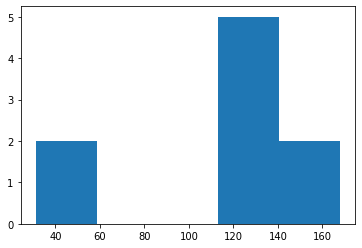

In [36]:
inf = start_set[0]
latencies = []
for i in set(start_set)-{inf}:
    latencies.append(real_matrix[inf, i])

x = sorted(latencies, reverse=True)

fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, rectangles = ax.hist(x, 5, density=False)
fig.canvas.draw()
plt.show()


# Related work
## Set-reconcilation with cuckoo filters

### One filter per account?

The performance of the filter will degrade with more values inserted. 
To improve performance we need to introduce moving window of the elements, or limit the number of transactions. 

Filter will be filled with transaction id/hash. 

Having a filter and a new transaction one can check quickly if the transacion is inserted in the right time. 
Bloom clock 

## Transaction 

Source transaction: Account $A$ is making a sending bandwith transaction to $B$:
   
   Transaction id: $T_{id}$, update to state $A$ and to state $B$  


Transaction is a state transaction of a Peer A from $T_k: s_k -> s_{k+1}$. 

State can be represented as a Bloom clock? Counting Bloom Filter or Cuckoo filter

Each peer has own clock, event happend can be computed -> $H_k(B)+=1$ for each $H_k$. This will update certain cells in the clock. 

Transactions with different peers can be executed concurrently and later merged. 


